In [1]:
import numpy as np
from time import time
import os
import sys
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import psutil
from tqdm import tqdm
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb
from scipy.linalg import toeplitz
import scipy.linalg as sl
from scipy.signal import convolve2d
from scipy.signal import convolve
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [2]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/func_0'
fictrac = bbb.load_fictrac(os.path.join(directory, 'fictrac'))


~~ load_fictrac ~~
load_fictrac done. Duration: 3.00 sec


In [12]:
def fft_signal(signal, sampling_rate, duration):
    """ Performs FFT on a signal.

    Parameters
    ----------
    signal: 1D numpy array
    sampling_rate: in Hz (I think... check)
    duration: int (in sec?). Can probably calulate this instead of requiring.

    Returns
    -------
    y: signal
    Y: fft
    t: times """
    
    Fs = sampling_rate
    y = signal
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,duration,Ts) # time vector
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return y, Y, t, frq

In [7]:
fps = 50
dur = 1000 * 30 * 60
camera_rate = 1/fps * 1000 # camera frame rate in ms
raw_fictrac_times = np.arange(0,dur,camera_rate)

In [5]:
dx = np.asarray(fictrac['dRotLabX'])
dy = np.asarray(fictrac['dRotLabY'])
dz = np.asarray(fictrac['dRotLabZ'])
fictrac_v = np.sqrt(dx*dx + dy*dy + dz*dz)

In [43]:
signal = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabY']),sigma=3)

In [46]:
y,Y,t,frq = fft_signal(dy, fps, 1800)

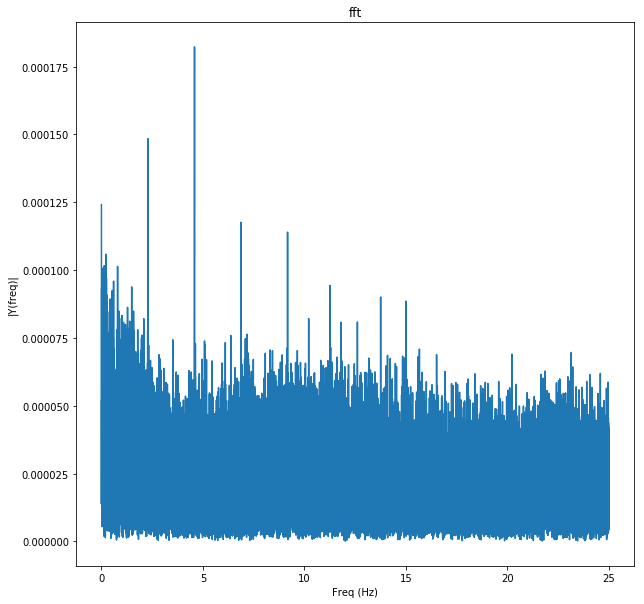

In [47]:
plt.figure(figsize=(10,10))

plt.plot(frq,abs(Y)) # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.title('fft')
#plt.ylim(0,.002)
#plt.xlim(0,3)
plt.show()

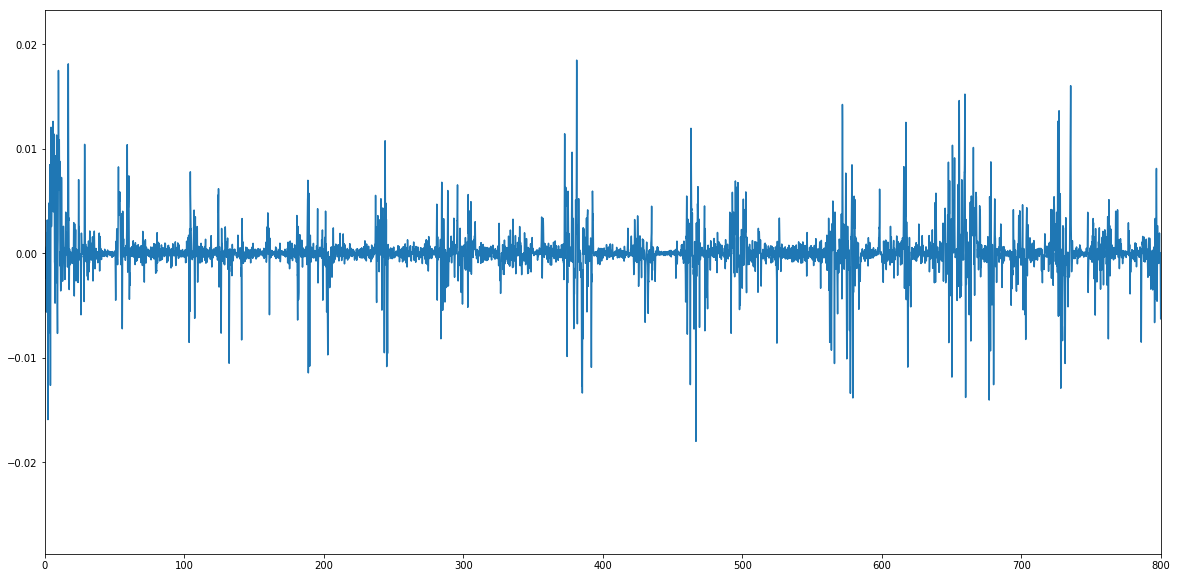

In [38]:
plt.figure(figsize=(20,10))
plt.plot(t,scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabY']),sigma=5))
plt.xlim(0,800)
plt.show()